# A small study on online Video Game Sales

This is Video Game Sales Data from Kaggle scraped from a video game website. The objective if this study is:
1) Ascertaining World_Sales based on sales in North America and other possible factors
2) Drawing insights from the data

* Insights and general observations from the data are at the end of the analysis

In [1]:
#Importing common libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
#Reading sample data
df = pd.read_csv('vgsales.csv')

In [3]:
#Reviewing top  5 values of the sample
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#Exploring more details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Vieiwng basic statistics of numeric data
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


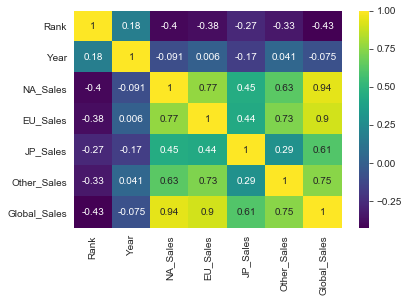

In [6]:
# Correlation heatmap. The cell values indicate numerical value of correlation and color represents correlation level based on scale legend on the right.
sns.heatmap(df.corr(),cmap = 'viridis',annot = True)

# Missing Value Imputation

In [7]:
print('The missing values % for each feature is:')
print(round(df.isnull().sum()/len(df)*100,4))

The missing values % for each feature is:
Rank            0.0000
Name            0.0000
Platform        0.0000
Year            1.6327
Genre           0.0000
Publisher       0.3494
NA_Sales        0.0000
EU_Sales        0.0000
JP_Sales        0.0000
Other_Sales     0.0000
Global_Sales    0.0000
dtype: float64


First Missing value Feature - Year

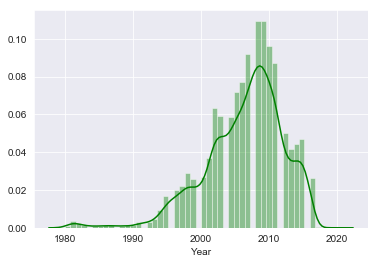

In [8]:
# Plotting Year value

sns.distplot(df['Year'].dropna(),bins=50,color='g')

The data is provided for sale since 1980 - the data point (1980 to 1995) inclusion effects our accuracy. Given the change in technology and preferences between the year data points, this data information adds more noise.

In [9]:
# Exploring the median,mode and mean values for year

print('Year - Mean value:',round(df['Year'].mean()))
print('Year - Median value:',df['Year'].median())
print('Year - Mode value:',df['Year'].mode()[0])

Year - Mean value: 2006
Year - Median value: 2007.0
Year - Mode value: 2009.0


The distribution is not perfectly normal in its spread, with slight skew on the right. 
However, Mean,Median and Mode all seem to converge to 2007 hence, we will impute median for missing year values.

In [10]:
# Viewing data before 1995 given low data points before 1995

df = df[df['Year']>1995]

In [11]:
#Filling median as missing values for year 
df['Year'].fillna(df['Year'].median(),inplace = True)

Second missing value feature: Platform

In [12]:
print('The Mode value of platform feature:',df['Platform'].mode()[0])

The Mode value of platform feature: DS


In [13]:
#Top 5 Platform on the basis of frequency
df['Platform'].value_counts().head()

DS      2132
PS2     2127
PS3     1304
Wii     1290
X360    1235
Name: Platform, dtype: int64

In [14]:
#Filling in mode value for all missing features

df['Platform'].fillna(value = df['Platform'].mode()[0],inplace = True)

# EDA - Exploring Data

In [15]:
print('This dataset has',(df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] == df['Global_Sales']).sum(),"records where various segment's sale exactly matches Global_Sales out of a total of", len(df),'records')
print('This means that majority of our world_sales is dependent on the segments listed in the dataset, there are other unaccounted for segments that are not in this dataset')

This dataset has 9140 records where various segment's sale exactly matches Global_Sales out of a total of 15622 records
This means that majority of our world_sales is dependent on the segments listed in the dataset, there are other unaccounted for segments that are not in this dataset


In [16]:
# The rank feature is a unique label for each row which doesn't add any value to the analysis.
print( 'We have',df['Rank'].nunique(),'unique values for "Rank" feature, compared to a total of',len(df))

We have 15622 unique values for "Rank" feature, compared to a total of 15622


In [17]:
# Dropping Rank.
df.drop('Rank',axis=1, inplace = True)

Let's try to identify the top 10 games for each sale segment. 

In [18]:
NA_top_games = df[['Name','NA_Sales']].groupby('Name').sum().sort_values('NA_Sales',ascending = False).head(10)
EU_top_games = df[['Name','EU_Sales']].groupby('Name').sum().sort_values('EU_Sales',ascending = False).head(10)
JP_top_games = df[['Name','JP_Sales']].groupby('Name').sum().sort_values('JP_Sales',ascending = False).head(10)
Other_top_games = df[['Name','Other_Sales']].groupby('Name').sum().sort_values('Other_Sales',ascending = False).head(10)
Global_top_games = df[['Name','Global_Sales']].groupby('Name').sum().sort_values('Global_Sales',ascending = False).head(10)

In [19]:
df_top_10 = pd.concat([NA_top_games,EU_top_games,JP_top_games,Other_top_games,Global_top_games],axis=1)

In [20]:
df_top_10

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Wii Sports,41.49,29.02,NaN,8.46,82.74
Grand Theft Auto V,23.46,23.04,NaN,8.03,55.92
Call of Duty: Black Ops,17.01,NaN,NaN,NaN,29.40
Mario Kart Wii,15.85,12.88,NaN,3.31,35.82
Wii Sports Resort,15.75,11.01,NaN,NaN,33.00
Call of Duty: Modern Warfare 3,15.58,11.29,NaN,3.35,30.83
Kinect Adventures!,14.97,NaN,NaN,NaN,NaN
Call of Duty: Ghosts,14.92,NaN,NaN,NaN,NaN
New Super Mario Bros. Wii,14.59,NaN,NaN,NaN,NaN
Call of Duty: Black Ops II,14.08,11.05,NaN,3.88,29.72


In [21]:
# The Name feature has alot of variation to be included into the analysis without extensive feature engineering.
df['Name'].value_counts()

Need for Speed: Most Wanted      12
FIFA 14                           9
LEGO Marvel Super Heroes          9
Ratatouille                       9
Angry Birds Star Wars             8
                                 ..
Haunted House                     1
Cool Boarders 4                   1
Maximum Capacity: Hotel Giant     1
River City Ransom EX              1
Driver                            1
Name: Name, Length: 10758, dtype: int64

In [22]:
# Dropping Name feature for now
df.drop('Name',axis=1, inplace = True)

Exploring the Platform feature. We will custom label encode 'Platform' feature ranked based on median Global_sales. 

In [23]:
# Exploring the Platform feature
print('Unique "Platforms":',df['Platform'].nunique())

Unique "Platforms": 24


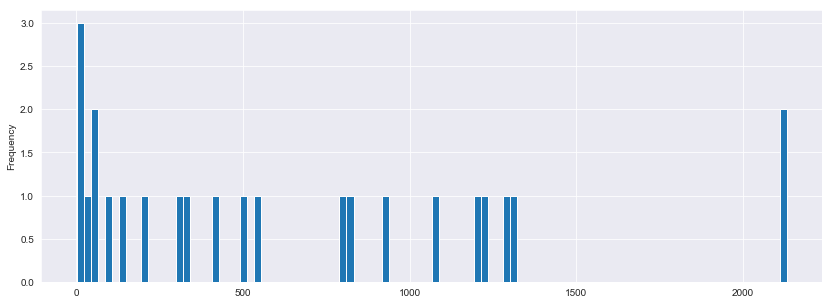

In [24]:
# We see that there are 578 unique values in this feature. Plotting it to explore more information.
df['Platform'].value_counts().plot.hist(bins = 100,figsize = (14,5))

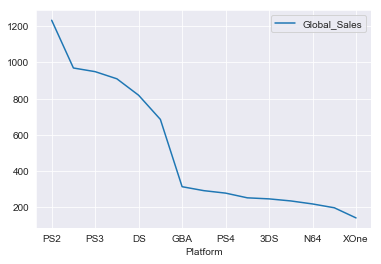

In [25]:
# Identifying the top 15 Platforms.
g = df[['Platform','Global_Sales']].groupby('Platform').sum().sort_values('Global_Sales',ascending = False).head(15)
g.plot()

In [26]:
print('Top', len(g) ,'Platforms (out of', df['Platform'].nunique(),') capture', round(g['Global_Sales'].sum()/df['Global_Sales'].sum()*100),'% of market share in our sample')

Top 15 Platforms (out of 24 ) capture 96.0 % of market share in our sample


In [27]:
# We rename all Platform, apart from top 10, as other and then craete dummy variable with this feature.

def rename_Platform(Platform):
    if Platform in g.reset_index()['Platform'].values:
        return Platform
    else:
        return 'Other'

In [28]:
df['Platform'] = df['Platform'].apply(rename_Platform)

In [29]:
#Creating dummy variables
Platform_dummy = pd.get_dummies(df['Platform'],drop_first=True)
df = pd.concat([df,Platform_dummy],axis=1)

In [30]:
#Dropping original Platform column
#Instead of drop first, we are dropping the 'Other variable' to remove multicollinearity
df.drop(['Platform','Other'],axis=1,inplace = True)

Favourite Genre of each sale segment.

In [31]:
# Top 10 
NA_top_Genre = df[['Genre','NA_Sales']].groupby('Genre').sum().sort_values('NA_Sales',ascending = False).head(10)
EU_top_Genre = df[['Genre','EU_Sales']].groupby('Genre').sum().sort_values('EU_Sales',ascending = False).head(10)
JP_top_Genre = df[['Genre','JP_Sales']].groupby('Genre').sum().sort_values('JP_Sales',ascending = False).head(10)
Other_top_Genre = df[['Genre','Other_Sales']].groupby('Genre').sum().sort_values('Other_Sales',ascending = False).head(10)
Global_top_Genre = df[['Genre','Global_Sales']].groupby('Genre').sum().sort_values('Global_Sales',ascending = False).head(10)

In [32]:
#Creating the 'Genre' dataframe
df_Genre = pd.concat([NA_top_Genre,EU_top_Genre,JP_top_Genre,Other_top_Genre,Global_top_Genre],axis=1)

In [33]:
df_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Action,811.01,508.39,143.72,183.71,1647.79
Sports,651.40,366.08,100.27,131.76,1249.94
Shooter,517.22,303.68,NaN,100.51,948.59
Misc,393.03,210.54,96.73,73.68,774.59
Racing,340.62,230.59,42.76,75.40,689.59
Role-Playing,323.30,187.12,298.98,57.47,867.00
Platform,313.77,168.09,70.63,45.92,598.75
Fighting,201.10,92.66,60.49,34.91,389.10
Simulation,177.07,110.99,57.83,30.98,377.13
Adventure,92.39,57.33,44.78,16.28,211.01


In [34]:
# One hot encoding the 'Genre' feature:
Genre = pd.get_dummies(df['Genre'],drop_first=True)

In [35]:
# Adding the dummies to the original dataframe 
df = pd.concat([df,Genre],axis=1)

In [36]:
# Dropping the 'Genre' feature
df.drop('Genre',axis=1,inplace=True)

Exploring the Publisher feature

In [37]:
# Finding out all unique 'Publisher'(s)
df['Publisher'].value_counts()

Electronic Arts                 1325
Activision                       938
Ubisoft                          917
Namco Bandai Games               884
Konami Digital Entertainment     787
                                ... 
Xing Entertainment                 1
Navarre Corp                       1
Cygames                            1
RED Entertainment                  1
Paon Corporation                   1
Name: Publisher, Length: 527, dtype: int64

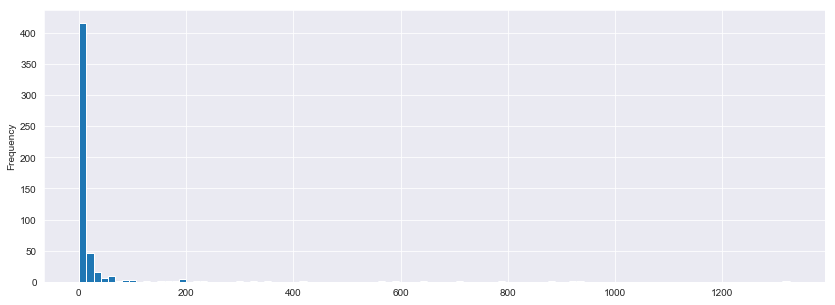

In [38]:
# We see that there are 578 unique values in this feature. Plotting it to explore more information.
df['Publisher'].value_counts().plot.hist(bins = 100,figsize = (14,5))

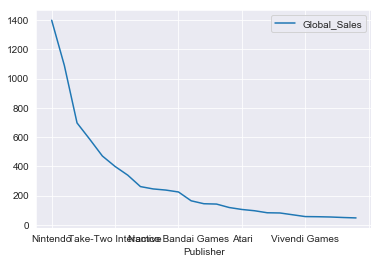

In [39]:
# Identifying the top 25 Publishers.
t = df[['Publisher','Global_Sales']].groupby('Publisher').sum().sort_values('Global_Sales',ascending = False).head(25)
t.plot()

In [40]:
print('Top', len(t) ,'publishers (out of', df['Publisher'].nunique(),') capture', round(t['Global_Sales'].sum()/df['Global_Sales'].sum()*100),'% of market share in our sample')

Top 25 publishers (out of 527 ) capture 89.0 % of market share in our sample


In [41]:
# We rename all publishers (apart from top 10) as 'other' and then create dummy variables with this feature.

def rename_Publisher(Publisher):
    if Publisher in t.reset_index()['Publisher'].values:
        return Publisher
    else:
        return 'Other'

In [42]:
df['Publisher'] = df['Publisher'].apply(rename_Publisher)

In [43]:
#Creating dummy variables
publisher_dummy = pd.get_dummies(df['Publisher'],drop_first=True)
df = pd.concat([df,publisher_dummy],axis=1)

In [44]:
#Dropping original Publisher column
#Instead of drop first, we are dropping the 'Other variable' to remove multicollinearity
df.drop(['Publisher','Other'],axis=1,inplace = True)

In [45]:
# Dropping EU_Sales,JP_Sales and Other_Sales

df.drop(['EU_Sales','JP_Sales','Other_Sales'],axis=1,inplace = True)

Exploring our Target Variable

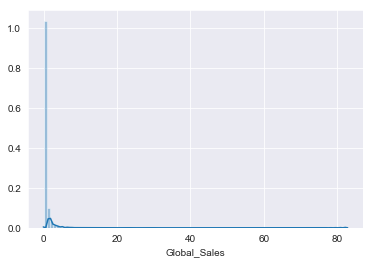

In [46]:
# Checking out the spread of our target variable ( Global_Sales)
sns.distplot(df['Global_Sales'],bins=100)

In [47]:
# Let's check out dataset where global sales is more than 5

df[df['Global_Sales']>5].describe()

,Year,NA_Sales,Global_Sales,DS,GBA,GC,N64,PC,PS,PS2,...,Nintendo,Sega,Sony Computer Entertainment,Square Enix,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Vivendi Games,Warner Bros. Interactive Entertainment
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.0,184.000000,184.0,184.000000,184.0,184.000000
mean,2006.679348,4.457065,9.907174,0.103261,0.038043,0.016304,0.038043,0.021739,0.092391,0.092391,...,0.353261,0.010870,0.092391,0.016304,0.0,0.070652,0.0,0.048913,0.0,0.005435
std,5.349062,3.954665,7.971070,0.305130,0.191823,0.126989,0.191823,0.146228,0.290368,0.290368,...,0.479287,0.103972,0.290368,0.126989,0.0,0.256942,0.0,0.216275,0.0,0.073721
min,1996.000000,0.070000,5.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,2002.750000,2.612500,5.735000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
50%,2008.000000,3.365000,7.215000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
75%,2011.000000,5.102500,10.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
max,2015.000000,41.490000,82.740000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000


In [48]:
print('Compared to our data of',len(df),'rows. The subest of data with Global_Sales > 5 is',round(len(df[df['Global_Sales']>5])/len(df)*100,2),'%')

Compared to our data of 15622 rows. The subest of data with Global_Sales > 5 is 1.18 %


In [49]:
#Let's reset out target data after removing all global_sales points >5

df = df[df['Global_Sales']<5]

In [50]:
print('The new dataset has',len(df),'rows')

The new dataset has 15436 rows


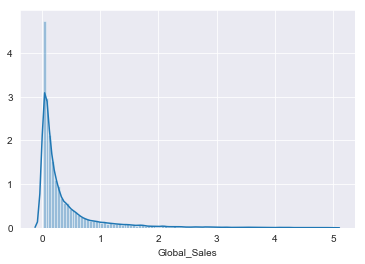

In [51]:
# Let's plot and see if removal of records where Global_sales points > 5 changes our Global_Sale distribution
sns.distplot(df['Global_Sales'],bins = 100)

In [52]:
# There is improvement but the target variable still doesn't appear normal and is skewed to the left.

from scipy.stats import skew,kurtosis

print('The data has a skewness of',round(skew(df['Global_Sales']),2))
print('The data has a kurtosis of',round(kurtosis(df['Global_Sales']),2))

The data has a skewness of 3.29
The data has a kurtosis of 13.1


In [53]:
# Viewing our final dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15436 entries, 207 to 16597
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    15436 non-null  float64
 1   NA_Sales                                15436 non-null  float64
 2   Global_Sales                            15436 non-null  float64
 3   DS                                      15436 non-null  uint8  
 4   GBA                                     15436 non-null  uint8  
 5   GC                                      15436 non-null  uint8  
 6   N64                                     15436 non-null  uint8  
 7   PC                                      15436 non-null  uint8  
 8   PS                                      15436 non-null  uint8  
 9   PS2                                     15436 non-null  uint8  
 10  PS3                                     15436 non-null  

In [54]:
print('We have removed', round((100-len(df)/16598*100),2),'% data from the dataset to treat extreme outliers' )

We have removed 7.0 % data from the dataset to treat extreme outliers


# Setting up train and test set

In [55]:
X = df.drop(['Global_Sales'],axis=1)
y = df['Global_Sales']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Running Linear Regression and testing accuracy

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm = LinearRegression()

In [60]:
lm.fit(X_train,y_train)

LinearRegression()

In [61]:
lm.intercept_

5.086662367225386

In [62]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Year,-0.002491
NA_Sales,1.569896
DS,-0.087651
GBA,-0.144054
GC,-0.180510
N64,-0.198697
PC,-0.027138
PS,-0.015529
PS2,0.002713
PS3,0.065314


In [63]:
predict = lm.predict(X_test)

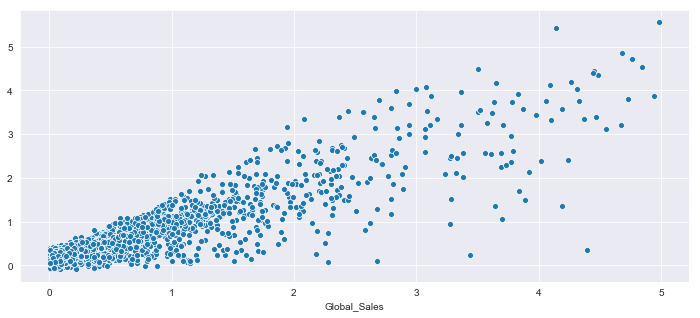

In [70]:
plt.figure(figsize=(12,5))
sns.scatterplot(y_test,predict)

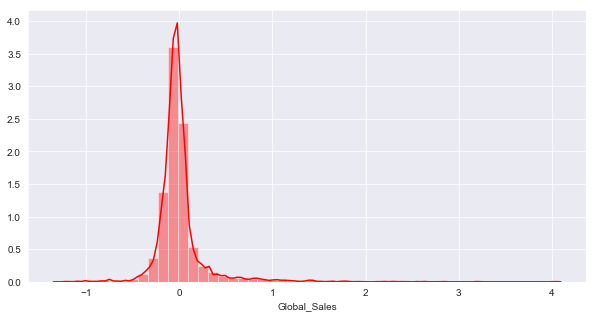

In [73]:
#Plotting the residuals in test
plt.figure(figsize = (10,5))
sns.distplot((y_test-predict),bins=50,color='r');

In [66]:
from sklearn import metrics

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('The mean global_sales is:',round(df['Global_Sales'].mean(),4))

MAE: 0.1425954360812039
MSE: 0.07463050559443969
RMSE: 0.27318584442543814
The mean global_sales is: 0.4042


In [68]:
print('R-squared for train set is',lm.score(X_train,y_train))
print('R-squared for test set is',lm.score(X_test,y_test))

R-squared for train set is 0.8030171657378105
R-squared for test set is 0.824319091736707


Conclusion : 
--
Although the test has low accuracy score (82% of test data variation is explained by the existing features), it can be imporved with inclusion of additional features or data collection. 

However, this model still seems to do a moderatly good job of predicting global sales given year of sales,north america sale, platform,genre and publisher for various game titles(names). 

The model is predicting higher values more inaccurately as indicated by the error metrics and residual graph.

For a general purpose model, this analysis did provide some insights onto the Video Game Industry, as noted below.

Another point to note from the percentiles is the high variation in data. 
75% of Global_Sales data falls within 0.47 with a max of ($)5 with outlier removal. 
More data collection is required for more accurcay.    

Favourtie Genre by each Region:
---
North America : Action

European Union : Action

Japan : Role-Playing

Globally : Action and Sports
                    
Clearly, Action and Sports are top categories in gaming.
Japan has very distinct taste in games. Given it's low correlation with worldwide sales and differentiated preferences, it is safe to assume that a specialized approach is required to capture that market in gaming.
Even though NA and EU have intrest in similar Genre, EU leans more towards sports centric games based on EDA of game names.
    

Top game titles
--
Every region clearly has very different preferences in games. Not even a single game in top 10 category is liked acorss all regions. Some popular categories of games are -

Popular Categories North America:
//
Wii Sports,
Super Mario,
Call of Duty,
Grand Theft Auto.

Popular Categories European Union:
//
Wii Sports,
Grand Theft Auto V,	
Call of Duty,
FIFA.

Popular Categories Japan
//
Pokemon (various extensions).

We might get back to imporving this analysis some day!

# Thanks for viewing!